<a href="https://colab.research.google.com/github/DepartmentOfStatisticsPUE/air-2020/blob/master/notebooks/7_regresja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [0]:
gosp = pd.read_excel("gospodarstwa.xlsx")
gosp.head()

,klm,woj,trb,zut,d21,d32,d345,d347,d348,d36,d38,d61,d63,los,dochg,wydg
0,1,2,11,5,2,1,1,2,1,69,2,3,3,1.0,1191.41,1037.29
1,1,2,6,1,2,1,2,2,1,74,3,4,2,2.0,821.00,887.01
2,1,2,3,1,1,3,1,2,1,83,3,4,1,4.0,6669.87,6792.13
3,1,2,12,5,2,1,3,3,2,44,2,4,1,3.0,1872.59,1806.83
4,1,2,1,5,1,3,1,2,1,110,5,4,2,2.0,1731.44,2795.08


Usuwamy braki danych ze zbioru oraz rekordy w których dochód jest mniejszy od lub równy 0

In [0]:
gosp2 = gosp.dropna().loc[gosp.dochg > 0]
print(gosp.shape)  ## 32 487
print(gosp2.shape) ## 32 291

(32487, 16)
(32291, 16)


Sprawdzamy z wykresem rozrzutu czy jest zależność liniowa między wydatkami, a dochodami gospodarstw domowych

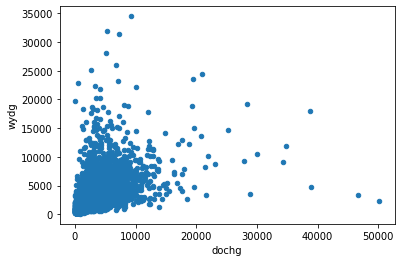

In [0]:
gosp2.plot.scatter(x = "dochg", y = "wydg")

In [0]:
model1 = smf.ols(formula = "wydg ~ dochg",
                 data = gosp2)
model1

In [0]:
model1_fit = model1.fit()
model1_fit

In [0]:
print(model1_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   wydg   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                 2.364e+04
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:06:15   Log-Likelihood:            -2.7334e+05
No. Observations:               32291   AIC:                         5.467e+05
Df Residuals:                   32289   BIC:                         5.467e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    687.4768     10.725     64.102      0.0

In [0]:
model2=smf.ols(formula = "wydg ~ dochg + C(woj)", data = gosp2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wydg   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     1484.
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:21:30   Log-Likelihood:            -2.7330e+05
No. Observations:               32291   AIC:                         5.466e+05
Df Residuals:                   32274   BIC:                         5.468e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      641.3136     23.716     27.041   

In [0]:
model3=smf.ols(formula = "wydg ~ dochg + C(woj) + C(klm)", data = gosp2).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                   wydg   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     1144.
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:38:42   Log-Likelihood:            -2.7322e+05
No. Observations:               32291   AIC:                         5.465e+05
Df Residuals:                   32269   BIC:                         5.467e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      815.5101     29.110     28.015   